# Data Creation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from karpiu.simulation import make_mmm_daily_data, make_adstock_matrix
from karpiu.utils import insert_events

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
N_STEPS = 365 * 3
COEFS = [0.03, 0.05, 0.028, 0.01, 0.03]
CHANNELS = ['tv', 'radio', 'social', 'promo', 'search']
LOC = np.array([10000, 5000, 3000, 2000, 850])
SCALE = np.array([5000,3000, 1000, 550, 500])
SCALABILITY =  np.array([1.1, 0.75, 1.3, 1.5, 0.9])
SEED = 2022
START_DATE = '2019-01-01'

## Utils

In [4]:
adstock_matrix = make_adstock_matrix(
    n_steps=28, 
    peak_step = np.array([10, 8, 5, 3, 2]),
    left_growth = np.array([.05, .08, .1, .5, .75]),
    right_growth = np.array([-.03, -0.6, -0.5, -.1, -.25]),
)

In [23]:
adstock_args = {
    "n_steps": 28,
    "peak_step": np.array([10, 8, 5, 3, 2]),
    "left_growth": np.array([0.05, 0.08, 0.1, 0.5, 0.75]),
    "right_growth": np.array([-0.03, -0.6, -0.5, -0.1, -0.25]),
}

In [5]:
adstock_matrix.shape

(5, 28)

## Core Simulations

In [52]:
np.random.seed(SEED)
df, scalability_df, adstock_df, _  = make_mmm_daily_data(    
    channels_coef=COEFS,
    channels=CHANNELS,
    features_loc=LOC,
    features_scale=SCALE,
    scalability=SCALABILITY,
    adstock_args=adstock_args,
    n_steps=N_STEPS,
    start_date="2019-01-01",
    country="US",
)

In [51]:
df.tail(3)

,date,sales,tv,radio,social,promo,search,new-years-day,martin-luther-king-jr-day,washingtons-birthday,...,labor-day,columbus-day,veterans-day,thanksgiving,christmas-day,independence-day-observed,juneteenth-national-independence-day-observed,juneteenth-national-independence-day,christmas-day-observed,new-years-day-observed
1092,2022-02-20,1561.0,0.0,5488.0,0.0,1839.0,1052.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1093,2022-02-21,4029.0,0.0,0.0,2216.0,2336.0,1355.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1094,2022-02-22,1610.0,5712.0,0.0,0.0,1782.0,1314.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df.dtypes

date                                             datetime64[ns]
sales                                                   float64
tv                                                      float64
radio                                                   float64
social                                                  float64
promo                                                   float64
search                                                  float64
new-years-day                                           float64
martin-luther-king-jr-day                               float64
washingtons-birthday                                    float64
memorial-day                                            float64
independence-day                                        float64
labor-day                                               float64
columbus-day                                            float64
veterans-day                                            float64
thanksgiving                            

In [34]:
scalability_df.head(3)

,regressor,scalability
0,tv,1.10
1,radio,0.75
2,social,1.30


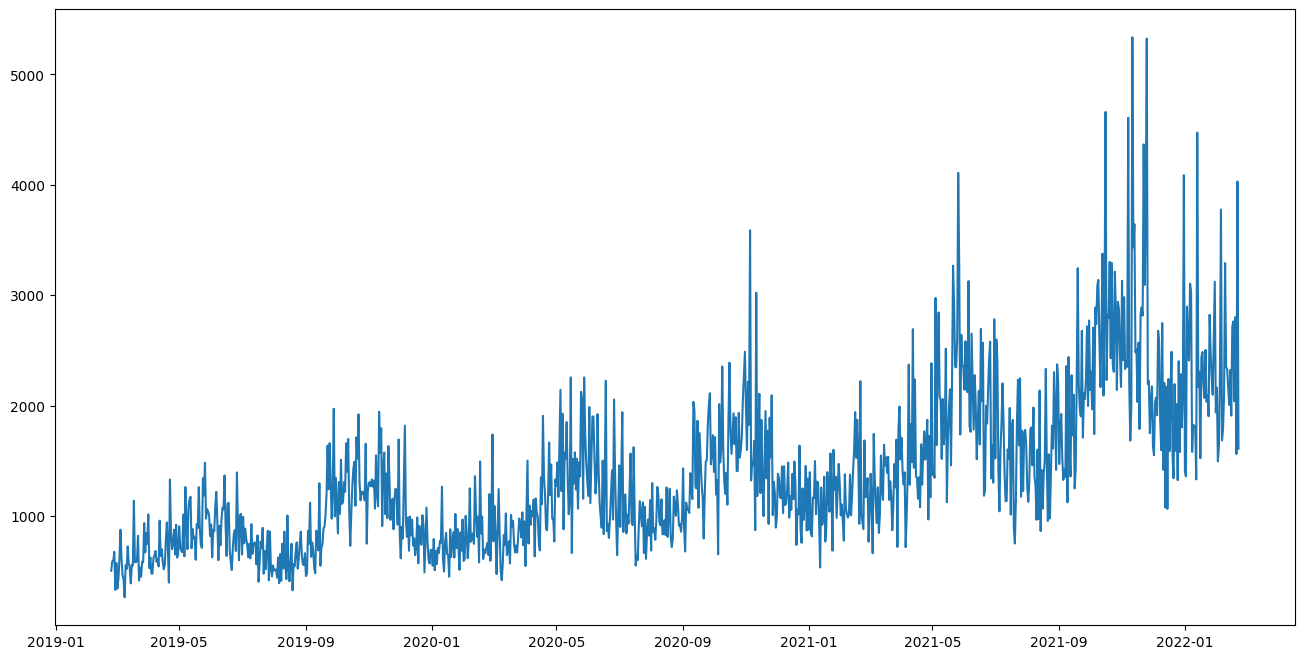

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(df["date"].values, df["sales"].values);

In [ ]:
# df.to_csv('data.csv', index=False)
# scalability_df.to_csv('scalability_df.csv', index=False)